In [ ]:
import pickle

pickle_file_path = 'Downloads/sequences_data.pkl'

with open(pickle_file_path, 'rb') as file:
    sequences_data = pickle.load(file)

In [ ]:
for category, sequences in sequences_data.items():
    n_count = sum(seq.count('N') for seq in sequences)
    sequences_with_n = [seq for seq in sequences if 'N' in seq]

    print(f"\nCategory: {category}")
    print(f"Total 'N' occurrences: {n_count}")
    print(f"Number of sequences with 'N': {len(sequences_with_n)}")
    print(f"Percentage of sequences with 'N': {len(sequences_with_n) / len(sequences) * 100:.2f}%")


Category: nonpathogenic_train.fasta
Total 'N' occurrences: 3012868
Number of sequences with 'N': 2602087
Percentage of sequences with 'N': 26.02%

Category: nonpathogenic_val.fasta
Total 'N' occurrences: 375820
Number of sequences with 'N': 324799
Percentage of sequences with 'N': 25.98%

Category: nonpathogenic_test_1.fasta
Total 'N' occurrences: 187790
Number of sequences with 'N': 162402
Percentage of sequences with 'N': 25.98%

Category: nonpathogenic_test_2.fasta
Total 'N' occurrences: 187825
Number of sequences with 'N': 162338
Percentage of sequences with 'N': 25.97%

Category: pathogenic_train.fasta
Total 'N' occurrences: 3009443
Number of sequences with 'N': 2598858
Percentage of sequences with 'N': 25.99%

Category: pathogenic_val.fasta
Total 'N' occurrences: 377031
Number of sequences with 'N': 325581
Percentage of sequences with 'N': 26.05%

Category: pathogenic_test_1.fasta
Total 'N' occurrences: 187697
Number of sequences with 'N': 162244
Percentage of sequences with 'N'

In [ ]:
filtered_sequences_data = {}
for category, sequences in sequences_data.items():
    filtered_sequences = [seq for seq in sequences if 'N' not in seq]
    filtered_sequences_data[category] = filtered_sequences
    print(f"{category}: {len(filtered_sequences)} sequences remaining after filtering.")


nonpathogenic_train.fasta: 7397937 sequences remaining after filtering.
nonpathogenic_val.fasta: 925206 sequences remaining after filtering.
nonpathogenic_test_1.fasta: 462601 sequences remaining after filtering.
nonpathogenic_test_2.fasta: 462665 sequences remaining after filtering.
pathogenic_train.fasta: 7401293 sequences remaining after filtering.
pathogenic_val.fasta: 924439 sequences remaining after filtering.
pathogenic_test_1.fasta: 462775 sequences remaining after filtering.
pathogenic_test_2.fasta: 462515 sequences remaining after filtering.


In [ ]:
import pickle
import os

filtered_data_path = os.path.expanduser('~/Downloads/filtered_sequences_data.pkl')

with open(filtered_data_path, 'wb') as f:
    pickle.dump(filtered_sequences_data, f)

print(f"Filtered data saved to {filtered_data_path}")

Filtered data saved to /home/iit/Downloads/filtered_sequences_data.pkl


In [ ]:
for key in list(filtered_sequences_data.keys()):
    new_key = key.replace('.fasta', '')
    filtered_sequences_data[new_key] = filtered_sequences_data.pop(key)

for key in filtered_sequences_data.keys():
    print(key, ":", len(filtered_sequences_data[key]), "sequences remaining after filtering.")

nonpathogenic_train : 7397937 sequences remaining after filtering.
nonpathogenic_val : 925206 sequences remaining after filtering.
nonpathogenic_test_1 : 462601 sequences remaining after filtering.
nonpathogenic_test_2 : 462665 sequences remaining after filtering.
pathogenic_train : 7401293 sequences remaining after filtering.
pathogenic_val : 924439 sequences remaining after filtering.
pathogenic_test_1 : 462775 sequences remaining after filtering.
pathogenic_test_2 : 462515 sequences remaining after filtering.


In [ ]:
import random
train_sample_fraction = 0.10
val_test_sample_fraction = 0.10

def sample_sequences(data, fraction):
    sample_size = int(len(data) * fraction)
    return random.sample(data, sample_size)

sampled_sequences_data = {
    'nonpathogenic_train': sample_sequences(filtered_sequences_data['nonpathogenic_train.fasta'], train_sample_fraction),
    'nonpathogenic_val': sample_sequences(filtered_sequences_data['nonpathogenic_val.fasta'], val_test_sample_fraction),
    'nonpathogenic_test_1': sample_sequences(filtered_sequences_data['nonpathogenic_test_1.fasta'], val_test_sample_fraction),
    'nonpathogenic_test_2': sample_sequences(filtered_sequences_data['nonpathogenic_test_2.fasta'], val_test_sample_fraction),
    'pathogenic_train': sample_sequences(filtered_sequences_data['pathogenic_train.fasta'], train_sample_fraction),
    'pathogenic_val': sample_sequences(filtered_sequences_data['pathogenic_val.fasta'], val_test_sample_fraction),
    'pathogenic_test_1': sample_sequences(filtered_sequences_data['pathogenic_test_1.fasta'], val_test_sample_fraction),
    'pathogenic_test_2': sample_sequences(filtered_sequences_data['pathogenic_test_2.fasta'], val_test_sample_fraction),
}

for category, sample in sampled_sequences_data.items():
    print(f"{category}: {len(sample)} sequences sampled.")

nonpathogenic_train: 739793 sequences sampled.
nonpathogenic_val: 92520 sequences sampled.
nonpathogenic_test_1: 46260 sequences sampled.
nonpathogenic_test_2: 46266 sequences sampled.
pathogenic_train: 740129 sequences sampled.
pathogenic_val: 92443 sequences sampled.
pathogenic_test_1: 46277 sequences sampled.
pathogenic_test_2: 46251 sequences sampled.


In [ ]:
def extract_kmers(sequence, k=6):
    """Extract k-mers of specified length from a single sequence."""
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

In [ ]:
k = 6
kmers_data = {}
for category, sequences in filtered_sequences_data.items():
    kmers_data[category] = [' '.join(extract_kmers(seq, k)) for seq in sequences]
    print(f"{category}: Converted {len(sequences)} sequences to k-mers.")

nonpathogenic_train.fasta: Converted 7397937 sequences to k-mers.
nonpathogenic_val.fasta: Converted 925206 sequences to k-mers.
nonpathogenic_test_1.fasta: Converted 462601 sequences to k-mers.
nonpathogenic_test_2.fasta: Converted 462665 sequences to k-mers.
pathogenic_train.fasta: Converted 7401293 sequences to k-mers.
pathogenic_val.fasta: Converted 924439 sequences to k-mers.
pathogenic_test_1.fasta: Converted 462775 sequences to k-mers.
pathogenic_test_2.fasta: Converted 462515 sequences to k-mers.


In [ ]:
import pickle
import os

kmer_data_path = os.path.expanduser('~/Downloads/kmers_data.pkl')

with open(kmer_data_path, 'wb') as f:
    pickle.dump(kmers_data, f)

print(f"K-mer data saved to {kmer_data_path}")

K-mer data saved to /home/iit/Downloads/kmers_data.pkl


In [ ]:
sequence_lengths = {}
for category, sequences in filtered_sequences_data.items():
    lengths = [len(seq) for seq in sequences]
    sequence_lengths[category] = {
        'min_length': min(lengths),
        'max_length': max(lengths),
        'average_length': sum(lengths) / len(lengths)
    }

for category, stats in sequence_lengths.items():
    print(f"{category}:")
    print(f"  Min length: {stats['min_length']}")
    print(f"  Max length: {stats['max_length']}")
    print(f"  Average length: {stats['average_length']:.2f}")

nonpathogenic_train.fasta:
  Min length: 250
  Max length: 250
  Average length: 250.00
nonpathogenic_val.fasta:
  Min length: 250
  Max length: 250
  Average length: 250.00
nonpathogenic_test_1.fasta:
  Min length: 250
  Max length: 250
  Average length: 250.00
nonpathogenic_test_2.fasta:
  Min length: 250
  Max length: 250
  Average length: 250.00
pathogenic_train.fasta:
  Min length: 250
  Max length: 250
  Average length: 250.00
pathogenic_val.fasta:
  Min length: 250
  Max length: 250
  Average length: 250.00
pathogenic_test_1.fasta:
  Min length: 250
  Max length: 250
  Average length: 250.00
pathogenic_test_2.fasta:
  Min length: 250
  Max length: 250
  Average length: 250.00


In [ ]:
for category, sequences in filtered_sequences_data.items():
    print(f"Category: {category}")
    print("Sample sequence:", sequences[0])
    print("\n")

Category: nonpathogenic_train.fasta
Sample sequence: GTAAAGAGCAGAAAATATGAATGGGATGATGCTTTTTATATTCCTGATGTTTCTGATACTAAGAATGCACTGCGAGTTATCCATAACTTTATTAATAGACAGGGTAGTGAGCTAATTGGAGGATTAGTAATTCGTGATTTTATTGAGTTAAAAAATATAGGCAGACATCCTAAAAGTCATACGCCAATTTTTGAAGAATACCGAGTGTTTTATATAGGTAATGAGCCACTTGTAGTTATTAATTATTGGA


Category: nonpathogenic_val.fasta
Sample sequence: CCGCAATACGTAACAGTTGCGCCTGTTTGAACTGACGCAGCGCCTCAAGCTGTTGTTCTTCGTCATCTTCCGGCACGCGCAGCAAATACTGGCGCAGTTCATCACGGTAGGCATCCGTCCCCGGGCTGGTAGAGAGTGTTTGGATCGAGCAGTTCGTCCAGCAATAATGGATAACGCGCCAGTTGGCTGGCAATCATCGGTGATGCGGCACACAGAGAAATCAAATGCTTAAGCGCCGCGGGGAATTCAC


Category: nonpathogenic_test_1.fasta
Sample sequence: ATAACACTAGTATAGGTATAAAACTAAGTAGAGAATTAAAAGAAGACGAATTTATCATCATACAAAAATACAATTATGAAAAACAATCCACAGAGTTAGTTTTATTTGGAACATCAAGATTATGATACCAGTCTTTTTAAAAGCTTATTAAGTGATAATAAAACACTCGATTTTAGCTGGTATGGAAAAAAAACAAAAGAAGAAGATAGAAAATACTGCGTAGGTGGCGTAAATATCTTTGCTAAATCAG


Category: nonpathogenic_test_2.fasta
Sample sequence: CGTTGGTTCGAATCCAACGCAGGACACAT

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word')

In [ ]:
print("Vectorizing the training data...")
X_train = vectorizer.fit_transform(kmers_data['nonpathogenic_train.fasta'] + kmers_data['pathogenic_train.fasta'])

print("Vectorizing the validation and test data...")
X_val = vectorizer.transform(kmers_data['nonpathogenic_val.fasta'] + kmers_data['pathogenic_val.fasta'])
X_test_1 = vectorizer.transform(kmers_data['nonpathogenic_test_1.fasta'] + kmers_data['pathogenic_test_1.fasta'])
X_test_2 = vectorizer.transform(kmers_data['nonpathogenic_test_2.fasta'] + kmers_data['pathogenic_test_2.fasta'])

Vectorizing the training data...
Vectorizing the validation and test data...


In [ ]:
from scipy.sparse import vstack

X_test = vstack([X_test_1, X_test_2])

In [ ]:
from scipy import sparse
import os

train_vectorized_path = os.path.expanduser('~/Downloads/X_train_vectorized_full.npz')
val_vectorized_path = os.path.expanduser('~/Downloads/X_val_vectorized_full.npz')
test_vectorized_path = os.path.expanduser('~/Downloads/X_test_vectorized_full.npz')

sparse.save_npz(train_vectorized_path, X_train)
sparse.save_npz(val_vectorized_path, X_val)
sparse.save_npz(test_vectorized_path, X_test)

print("Vectorized data saved successfully.")

Vectorized data saved successfully.


In [ ]:
from scipy import sparse
import os

train_vectorized_path = os.path.expanduser('~/Downloads/X_train_vectorized_unique.npz')
val_vectorized_path = os.path.expanduser('~/Downloads/X_val_vectorized_unique.npz')
test_vectorized_path = os.path.expanduser('~/Downloads/X_test_vectorized_unique.npz')

sparse.save_npz(train_vectorized_path, X_train_unique)
sparse.save_npz(val_vectorized_path, X_val_unique)
sparse.save_npz(test_vectorized_path, X_test_unique)

print("Vectorized data saved successfully.")

Vectorized data saved successfully.


In [ ]:
import pickle
import os

filtered_data_path = os.path.expanduser('~/Downloads/filtered_sequences_data.pkl')

with open(filtered_data_path, 'rb') as f:
    filtered_sequences_data = pickle.load(f)

print("filterd seq data loaded")

filterd seq data loaded


In [ ]:
from scipy import sparse
import os
train_vectorized_path = os.path.expanduser('~/Downloads/X_train_vectorized_full.npz')
val_vectorized_path = os.path.expanduser('~/Downloads/X_val_vectorized_full.npz')
test_vectorized_path = os.path.expanduser('~/Downloads/X_test_vectorized_full.npz')

X_train = sparse.load_npz(train_vectorized_path)
X_val = sparse.load_npz(val_vectorized_path)
X_test = sparse.load_npz(test_vectorized_path)

print("Train feature matrix shape:", X_train.shape)
print("Validation feature matrix shape:", X_val.shape)
print("Test feature matrix shape:", X_test.shape)

Train feature matrix shape: (14799230, 4096)
Validation feature matrix shape: (1849645, 4096)
Test feature matrix shape: (1850556, 4096)


In [ ]:
y_train_nonpathogenic = [0] * len(filtered_sequences_data['nonpathogenic_train'])
y_val_nonpathogenic = [0] * len(filtered_sequences_data['nonpathogenic_val'])
y_test_1_nonpathogenic = [0] * len(filtered_sequences_data['nonpathogenic_test_1'])
y_test_2_nonpathogenic = [0] * len(filtered_sequences_data['nonpathogenic_test_2'])

y_train_pathogenic = [1] * len(filtered_sequences_data['pathogenic_train'])
y_val_pathogenic = [1] * len(filtered_sequences_data['pathogenic_val'])
y_test_1_pathogenic = [1] * len(filtered_sequences_data['pathogenic_test_1'])
y_test_2_pathogenic = [1] * len(filtered_sequences_data['pathogenic_test_2'])

In [ ]:
y_train = y_train_nonpathogenic + y_train_pathogenic
y_val = y_val_nonpathogenic + y_val_pathogenic
y_test = y_test_1_nonpathogenic + y_test_1_pathogenic + y_test_2_nonpathogenic + y_test_2_pathogenic

import numpy as np
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print("Labels created successfully:")
print(f"y_train: {len(y_train)} labels")
print(f"y_val: {len(y_val)} labels")
print(f"y_test: {len(y_test)} labels")

Labels created successfully:
y_train: 14799230 labels
y_val: 1849645 labels
y_test: 1850556 labels


In [ ]:
import numpy as np
from Bio.Seq import Seq

feature_names = vectorizer.get_feature_names_out()
kmer_to_rc = {kmer: str(Seq(kmer).reverse_complement()) for kmer in feature_names}
X_train_rc_aggregated = X_train.copy()
for i, kmer in enumerate(feature_names):
    rc_kmer = kmer_to_rc[kmer]
    if rc_kmer in feature_names:

        rc_index = np.where(feature_names == rc_kmer)[0][0]

        X_train_rc_aggregated[:, i] += X_train[:, rc_index]

        X_train_rc_aggregated[:, rc_index] = 0
print("Updated matrix with reverse complements aggregated:")
print(X_train_rc_aggregated.shape)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score
from scipy import sparse
import numpy as np

In [ ]:
batch_size = 50000

sgd_clf = SGDClassifier(loss='log', random_state=42, max_iter=1, tol=None)
for start in range(0, X_train.shape[0], batch_size):
    end = min(start + batch_size, X_train.shape[0])
    X_batch = X_train[start:end]
    y_batch = y_train[start:end]
    sgd_clf.partial_fit(X_batch, y_batch, classes=np.unique(y_train))
    print(f"Processed batch {start // batch_size + 1}")

y_val_pred = sgd_clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("SGD Classifier - Validation Accuracy:", val_accuracy)
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = sgd_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("SGD Classifier - Test Accuracy:", test_accuracy)
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Processed batch 1
Processed batch 2
Processed batch 3
Processed batch 4
Processed batch 5
Processed batch 6
Processed batch 7
Processed batch 8
Processed batch 9
Processed batch 10
Processed batch 11
Processed batch 12
Processed batch 13
Processed batch 14
Processed batch 15
Processed batch 16
Processed batch 17
Processed batch 18
Processed batch 19
Processed batch 20
Processed batch 21
Processed batch 22
Processed batch 23
Processed batch 24
Processed batch 25
Processed batch 26
Processed batch 27
Processed batch 28
Processed batch 29
Processed batch 30
Processed batch 31
Processed batch 32
Processed batch 33
Processed batch 34
Processed batch 35
Processed batch 36
Processed batch 37
Processed batch 38
Processed batch 39
Processed batch 40
Processed batch 41
Processed batch 42
Processed batch 43
Processed batch 44
Processed batch 45
Processed batch 46
Processed batch 47
Processed batch 48
Processed batch 49
Processed batch 50
Processed batch 51
Processed batch 52
Processed batch 53
Pr

/home/iit/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/iit/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/iit/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    925206
           1       0.50      1.00      0.67    924439

    accuracy                           0.50   1849645
   macro avg       0.25      0.50      0.33   1849645
weighted avg       0.25      0.50      0.33   1849645

SGD Classifier - Test Accuracy: 0.5000064845376201


/home/iit/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/iit/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    925266
           1       0.50      1.00      0.67    925290

    accuracy                           0.50   1850556
   macro avg       0.25      0.50      0.33   1850556
weighted avg       0.25      0.50      0.33   1850556



/home/iit/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = SGDClassifier(loss='hinge', random_state=42)
classes = np.array([0, 1])

batch_size = 500000
n_samples = X_train.shape[0]
for start in range(0, n_samples, batch_size):
    end = min(start + batch_size, n_samples)
    X_batch = X_train[start:end]
    y_batch = y_train[start:end]

    model.partial_fit(X_batch, y_batch, classes=classes)

y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1_score = f1_score(y_val, y_val_pred)

print("Validation Set Performance:")
print("Accuracy:", val_accuracy)
print("F1 Score:", val_f1_score)

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

print("\nTest Set Performance:")
print("Accuracy:", test_accuracy)
print("F1 Score:", test_f1_score)

Validation Set Performance:
Accuracy: 0.49979050033925426
F1 Score: 0.6664804187334179

Test Set Performance:
Accuracy: 0.5000064845376201
F1 Score: 0.6666724306751888


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get the absolute values of the coefficients as feature importances
feature_importances = np.abs(model.coef_).flatten()  # model.coef_ is the array of weights

# Get the top 20 features by importance
top_n = 20
top_feature_indices = np.argsort(feature_importances)[-top_n:][::-1]
top_feature_importances = feature_importances[top_feature_indices]

# Assuming you have feature names (e.g., k-mers) from vectorization
top_feature_names = [kmer_features[i] for i in top_feature_indices]  # replace `kmer_features` with actual feature names

# Plot the top feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(top_n), top_feature_importances, color='skyblue')
plt.yticks(range(top_n), top_feature_names)
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance (Coefficient Magnitude)")
plt.title("Top 20 Important Features for SGDClassifier")
plt.show()

In [ ]:
'''import numpy as np
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, classification_report

class BoatEnsemble:
    def __init__(self, n_estimators=5, max_samples=0.8, random_state=42, **hgb_params):
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.hgb_params = hgb_params
        self.base_estimators = [
            HistGradientBoostingClassifier(**hgb_params) for _ in range(n_estimators)
        ]
        self.random_state = random_state

    def fit(self, X, y, batch_size=100000):
        self.models = []
        n_samples = int(self.max_samples * X.shape[0])

        # Initialize each estimator on a bootstrap sample
        for estimator in self.base_estimators:
            X_resampled, y_resampled = resample(
                X, y, n_samples=n_samples, random_state=self.random_state
            )
            estimator.fit(X_resampled, y_resampled)
            self.models.append(estimator)

        # Incremental training with batches
        n_batches = X.shape[0] // batch_size
        for batch_idx in range(n_batches):
            start = batch_idx * batch_size
            end = start + batch_size
            X_batch = X[start:end]
            y_batch = y[start:end]
            for estimator in self.models:
                estimator.partial_fit(X_batch, y_batch)

    def predict(self, X):
        predictions = np.zeros((X.shape[0], self.n_estimators))
        for i, estimator in enumerate(self.models):
            predictions[:, i] = estimator.predict(X)
        return np.round(predictions.mean(axis=1)).astype(int)

# Prepare the model parameters for HistGradientBoosting
hgb_params = {
    "max_iter": 100,
    "max_depth": 10,
    "learning_rate": 0.1,
    "random_state": 42
}

# Initialize BoatEnsemble with HistGradientBoostingClassifier as the base estimator
boat_ensemble = BoatEnsemble(n_estimators=5, max_samples=0.8, **hgb_params)

# Training the model with batch size for incremental learning
boat_ensemble.fit(X_train, y_train, batch_size=100000)

# Evaluate on validation set
y_val_pred = boat_ensemble.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1_score = f1_score(y_val, y_val_pred)
print("Validation Set Performance:")
print("Accuracy:", val_accuracy)
print("F1 Score:", val_f1_score)
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on test set
y_test_pred = boat_ensemble.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
print("\nTest Set Performance:")
print("Accuracy:", test_accuracy)
print("F1 Score:", test_f1_score)
print("Classification Report:\n", classification_report(y_test, y_test_pred))


TypeError: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.

In [ ]:
import pickle

vectorizer_path = os.path.expanduser('~/Downloads/kmer_vectorizer_full.pkl')

with open(vectorizer_path, 'wb') as f:
    pickle.dump(vectorizer, f)

print(f"Vectorizer saved to {vectorizer_path}")

Vectorizer saved to /home/iit/Downloads/kmer_vectorizer_full.pkl


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from scipy import sparse

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from scipy import sparse

In [ ]:
pa_clf = PassiveAggressiveClassifier(random_state=42, max_iter=1, tol=None)

for start in range(0, X_train.shape[0], batch_size):
    end = min(start + batch_size, X_train.shape[0])
    X_batch = X_train[start:end]
    y_batch = y_train[start:end]
    pa_clf.partial_fit(X_batch, y_batch, classes=np.unique(y_train))
    print(f"Processed batch {start // batch_size + 1}")

y_val_pred = pa_clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Passive-Aggressive Classifier - Validation Accuracy:", val_accuracy)
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = pa_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Passive-Aggressive Classifier - Test Accuracy:", test_accuracy)
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Processed batch 1
Processed batch 2
Processed batch 3
Processed batch 4
Processed batch 5
Processed batch 6
Processed batch 7
Processed batch 8
Processed batch 9
Processed batch 10
Processed batch 11
Processed batch 12
Processed batch 13
Processed batch 14
Processed batch 15
Processed batch 16
Processed batch 17
Processed batch 18
Processed batch 19
Processed batch 20
Processed batch 21
Processed batch 22
Processed batch 23
Processed batch 24
Processed batch 25
Processed batch 26
Processed batch 27
Processed batch 28
Processed batch 29
Processed batch 30
Processed batch 31
Processed batch 32
Processed batch 33
Processed batch 34
Processed batch 35
Processed batch 36
Processed batch 37
Processed batch 38
Processed batch 39
Processed batch 40
Processed batch 41
Processed batch 42
Processed batch 43
Processed batch 44
Processed batch 45
Processed batch 46
Processed batch 47
Processed batch 48
Processed batch 49
Processed batch 50
Processed batch 51
Processed batch 52
Processed batch 53
Pr

/home/iit/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/iit/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/iit/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    925206
           1       0.50      1.00      0.67    924439

    accuracy                           0.50   1849645
   macro avg       0.25      0.50      0.33   1849645
weighted avg       0.25      0.50      0.33   1849645

Passive-Aggressive Classifier - Test Accuracy: 0.5000064845376201


/home/iit/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/iit/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00    925266
           1       0.50      1.00      0.67    925290

    accuracy                           0.50   1850556
   macro avg       0.25      0.50      0.33   1850556
weighted avg       0.25      0.50      0.33   1850556



/home/iit/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Train feature matrix shape:", X_train.shape)
print("Validation feature matrix shape:", X_val.shape)
print("Test feature matrix shape:", X_test.shape)

Train feature matrix shape: (14799230, 4096)
Validation feature matrix shape: (1849645, 4096)
Test feature matrix shape: (1850556, 4096)


In [ ]:
import pickle
import os

vectorizer_path = os.path.expanduser('~/Downloads/kmer_vectorizer_full.pkl')

with open(vectorizer_path, 'rb') as f:
    vectorizer = pickle.load(f)

print(f"Vectorizer loaded from {vectorizer_path}")

Vectorizer loaded from /home/iit/Downloads/kmer_vectorizer_full.pkl


/home/iit/anaconda3/lib/python3.9/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=200, random_state=42)
X_train_svd_temp = svd.fit_transform(X_train)

cumulative_explained_variance = svd.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid()
plt.show()


Category: nonpathogenic_train
Total sequences: 7397937
Average sequence length: 250.0


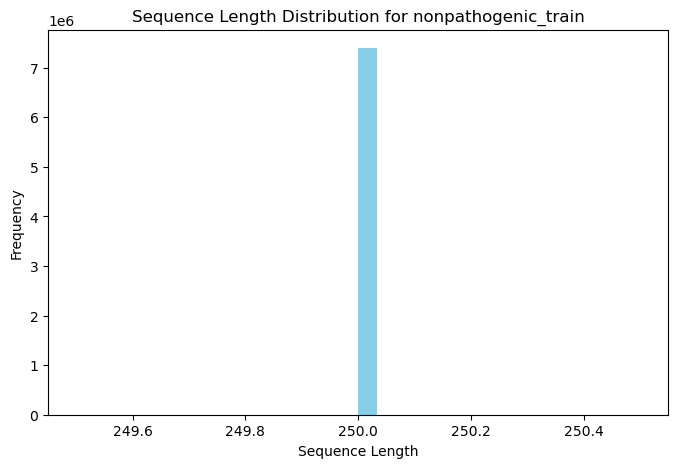

Nucleotide frequencies:
  G: 438480684 (23.71%)
  T: 486278516 (26.29%)
  A: 486246086 (26.29%)
  C: 438478964 (23.71%)


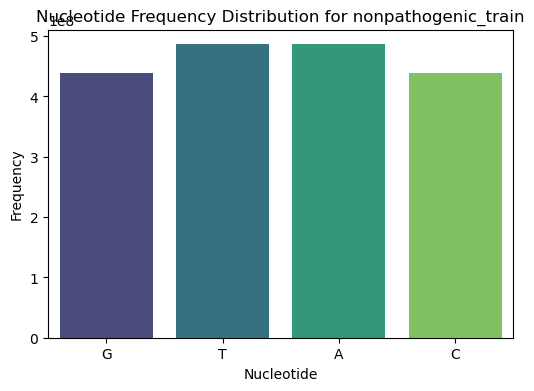


Category: nonpathogenic_val
Total sequences: 925206
Average sequence length: 250.0


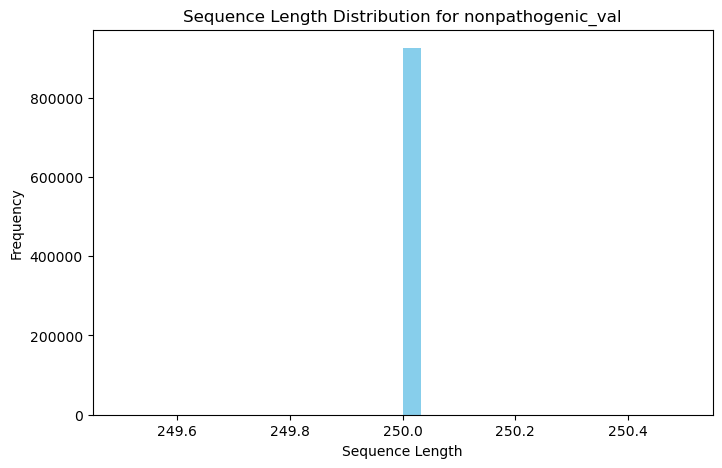

Nucleotide frequencies:
  C: 55306661 (23.91%)
  G: 55295778 (23.91%)
  A: 60336516 (26.09%)
  T: 60362545 (26.10%)


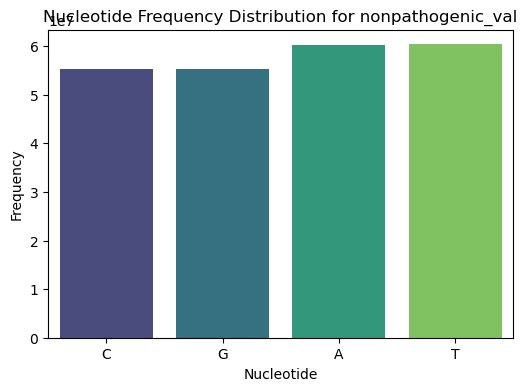


Category: nonpathogenic_test_1
Total sequences: 462601
Average sequence length: 250.0


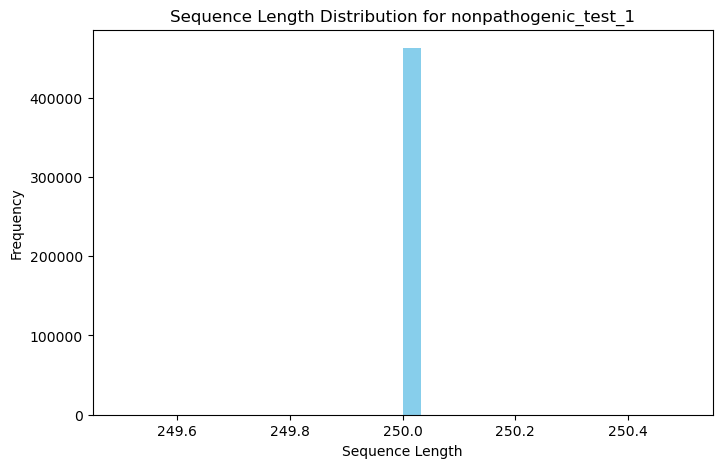

Nucleotide frequencies:
  A: 32247232 (27.88%)
  T: 32230412 (27.87%)
  C: 25589815 (22.13%)
  G: 25582791 (22.12%)


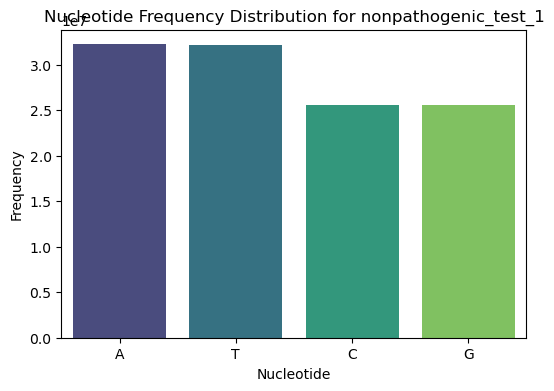


Category: nonpathogenic_test_2
Total sequences: 462665
Average sequence length: 250.0


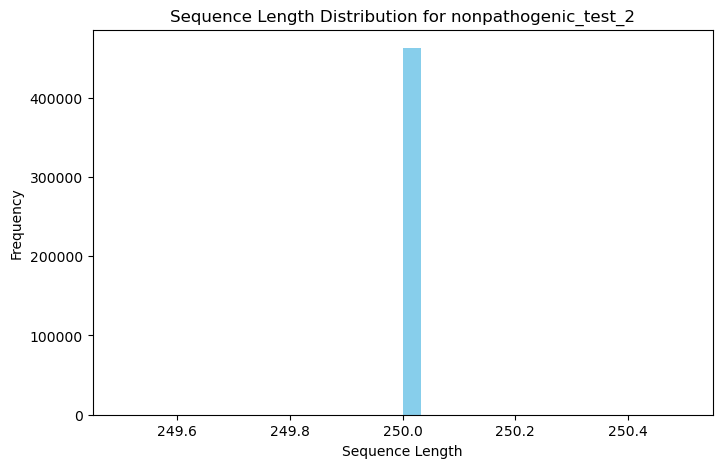

Nucleotide frequencies:
  C: 25595228 (22.13%)
  G: 25586887 (22.12%)
  T: 32245678 (27.88%)
  A: 32238457 (27.87%)


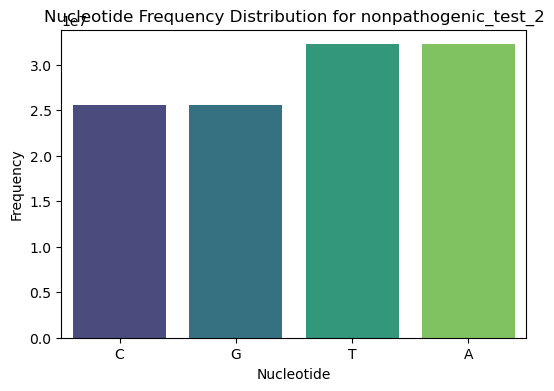


Category: pathogenic_train
Total sequences: 7401293
Average sequence length: 250.0


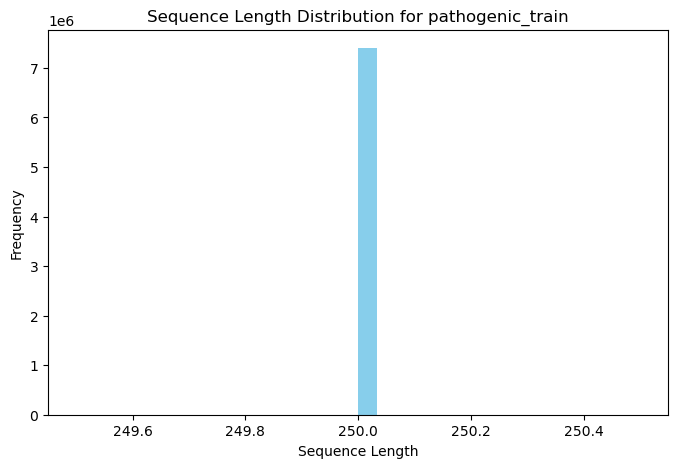

Nucleotide frequencies:
  T: 463210247 (25.03%)
  A: 463267611 (25.04%)
  G: 461958986 (24.97%)
  C: 461886406 (24.96%)


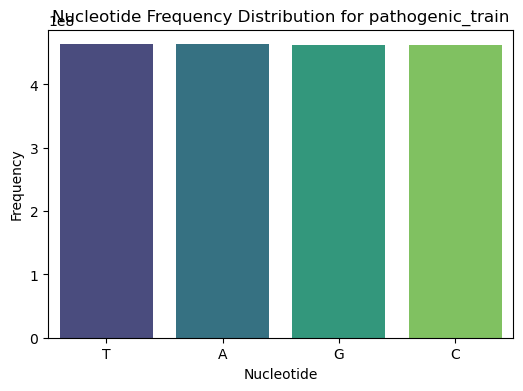


Category: pathogenic_val
Total sequences: 924439
Average sequence length: 250.0


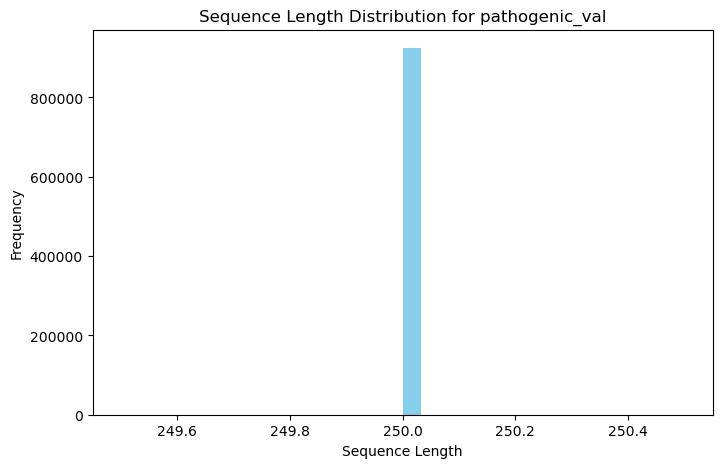

Nucleotide frequencies:
  G: 54091297 (23.41%)
  C: 54103023 (23.41%)
  A: 61452384 (26.59%)
  T: 61463046 (26.59%)


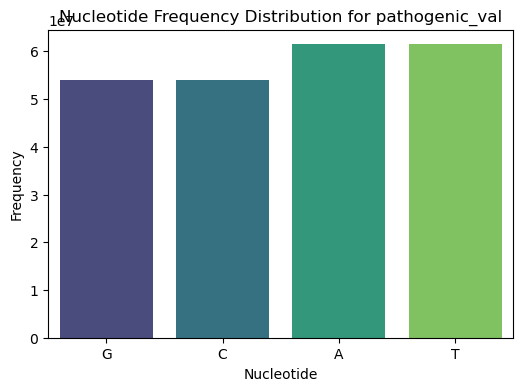


Category: pathogenic_test_1
Total sequences: 462775
Average sequence length: 250.0


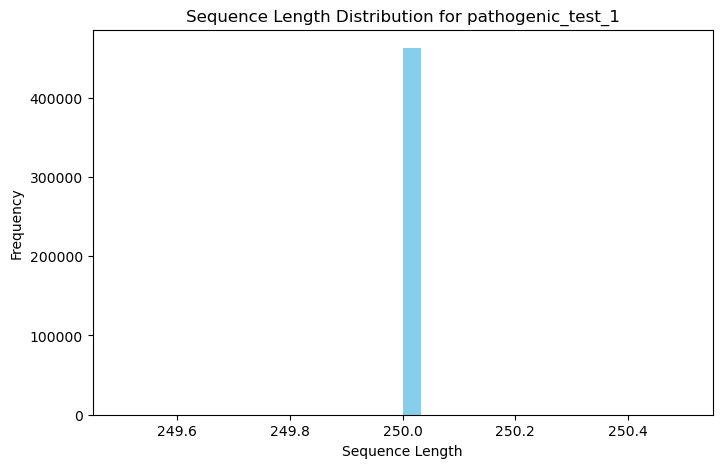

Nucleotide frequencies:
  A: 31273955 (27.03%)
  C: 26567010 (22.96%)
  T: 31267620 (27.03%)
  G: 26585165 (22.98%)


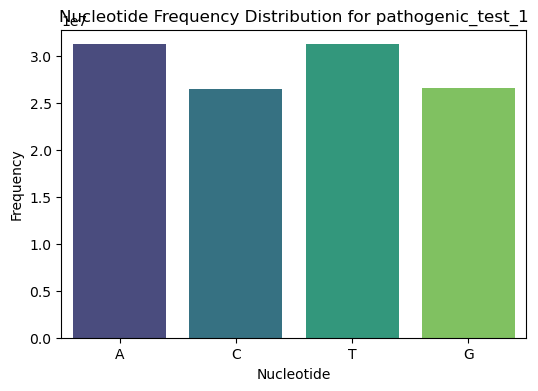


Category: pathogenic_test_2
Total sequences: 462515
Average sequence length: 250.0


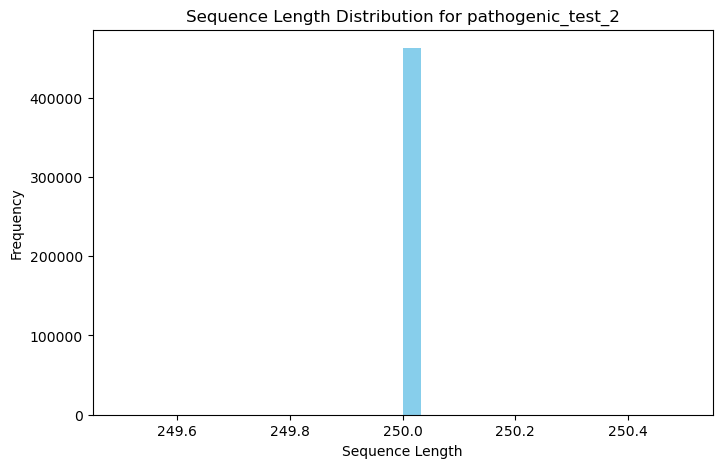

Nucleotide frequencies:
  A: 31254150 (27.03%)
  G: 26558350 (22.97%)
  T: 31246706 (27.02%)
  C: 26569544 (22.98%)


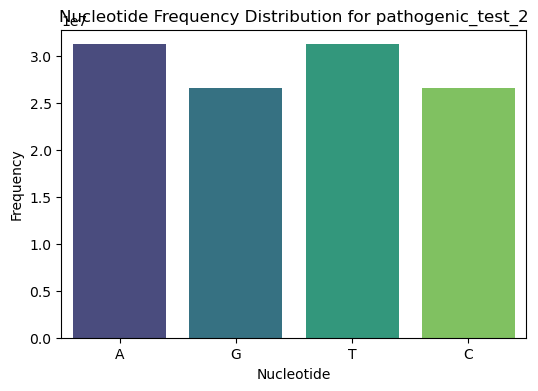

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

eda_results = {}

for category, sequences in filtered_sequences_data.items():
    print(f"\nCategory: {category}")

    num_sequences = len(sequences)
    print(f"Total sequences: {num_sequences}")

    lengths = [len(seq) for seq in sequences]
    avg_length = sum(lengths) / num_sequences
    print(f"Average sequence length: {avg_length}")

    plt.figure(figsize=(8, 5))
    plt.hist(lengths, bins=30, color='skyblue')
    plt.title(f"Sequence Length Distribution for {category}")
    plt.xlabel("Sequence Length")
    plt.ylabel("Frequency")
    plt.show()

    nucleotide_counts = Counter("".join(sequences))
    total_nucleotides = sum(nucleotide_counts.values())
    print("Nucleotide frequencies:")
    for nucleotide, count in nucleotide_counts.items():
        print(f"  {nucleotide}: {count} ({count/total_nucleotides*100:.2f}%)")

    nucleotide_df = pd.DataFrame(list(nucleotide_counts.items()), columns=['Nucleotide', 'Frequency'])
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Nucleotide', y='Frequency', data=nucleotide_df, palette='viridis')
    plt.title(f"Nucleotide Frequency Distribution for {category}")
    plt.xlabel("Nucleotide")
    plt.ylabel("Frequency")
    plt.show()

    eda_results[category] = {
        'num_sequences': num_sequences,
        'avg_length': avg_length,
        'nucleotide_counts': nucleotide_counts
    }

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X_nonpathogenic = X_train[y_train == 0]
X_pathogenic = X_train[y_train == 1]
nonpathogenic_kmer_counts = np.array(X_nonpathogenic.sum(axis=0)).flatten()
pathogenic_kmer_counts = np.array(X_pathogenic.sum(axis=0)).flatten()
kmer_features = vectorizer.get_feature_names_out()

kmer_df = pd.DataFrame({
    'k-mer': kmer_features,
    'Non-pathogenic': nonpathogenic_kmer_counts,
    'Pathogenic': pathogenic_kmer_counts
})

top_k = 20
top_nonpathogenic_kmers = kmer_df.sort_values('Non-pathogenic', ascending=False).head(top_k)
top_pathogenic_kmers = kmer_df.sort_values('Pathogenic', ascending=False).head(top_k)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

axs[0].barh(top_nonpathogenic_kmers['k-mer'], top_nonpathogenic_kmers['Non-pathogenic'], color='blue')
axs[0].set_title(f'Top {top_k} k-mers in Non-pathogenic Class')
axs[0].invert_yaxis()
axs[1].barh(top_pathogenic_kmers['k-mer'], top_pathogenic_kmers['Pathogenic'], color='red')
axs[1].set_title(f'Top {top_k} k-mers in Pathogenic Class')
axs[1].invert_yaxis()

plt.tight_layout()
plt.show()


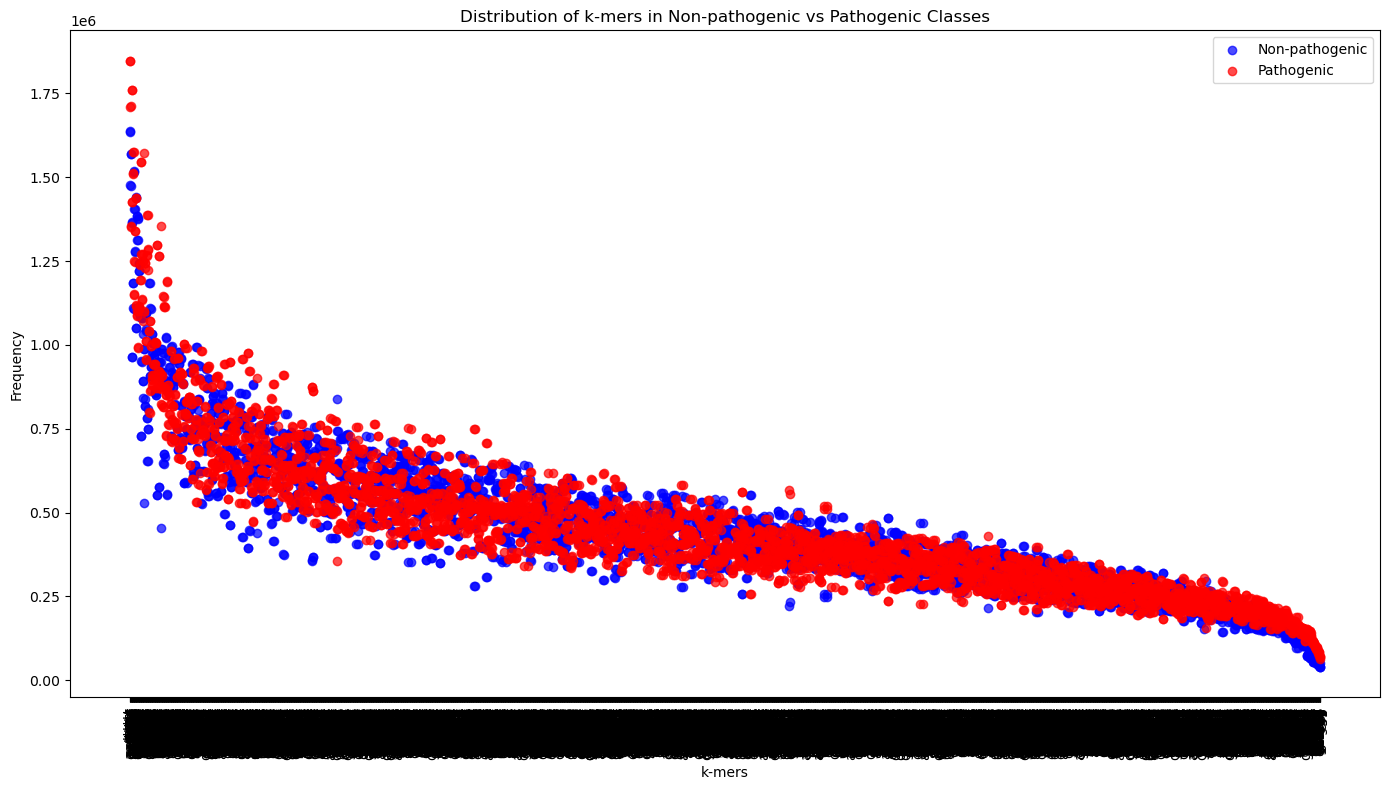

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.scatter(kmer_df['k-mer'], kmer_df['Non-pathogenic'], color='blue', label='Non-pathogenic', alpha=0.7)
ax.scatter(kmer_df['k-mer'], kmer_df['Pathogenic'], color='red', label='Pathogenic', alpha=0.7)

ax.set_title('Distribution of k-mers in Non-pathogenic vs Pathogenic Classes')
ax.set_xlabel('k-mers')
ax.set_ylabel('Frequency')
ax.legend()

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


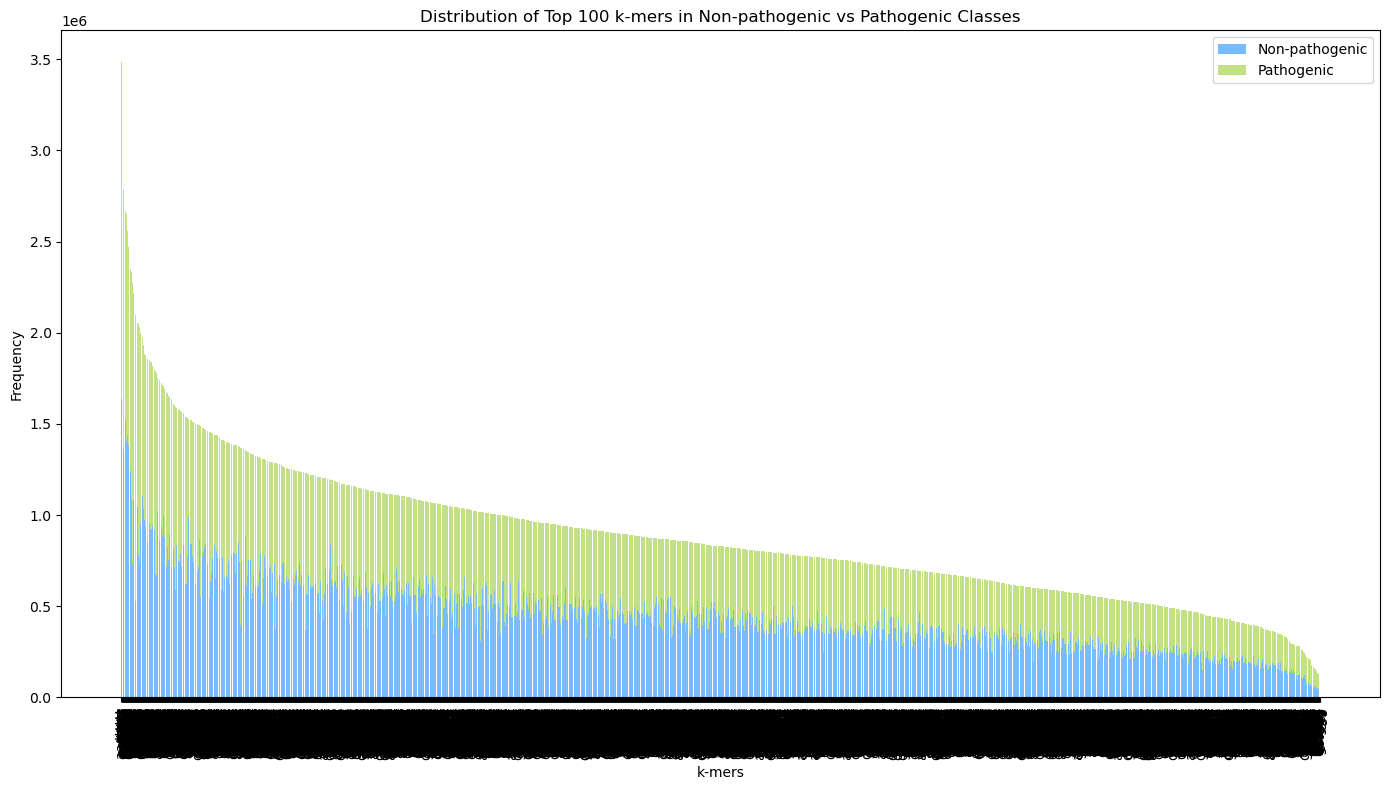

In [ ]:
kmer_df['Total'] = kmer_df['Non-pathogenic'] + kmer_df['Pathogenic']
kmer_df = kmer_df.sort_values(by='Total', ascending=False)

sample_kmers = kmer_df.head(4096)

fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(sample_kmers['k-mer'], sample_kmers['Non-pathogenic'], color='dodgerblue', alpha=0.6, label='Non-pathogenic')
ax.bar(sample_kmers['k-mer'], sample_kmers['Pathogenic'], color='yellowgreen', alpha=0.6, label='Pathogenic', bottom=sample_kmers['Non-pathogenic'])

ax.set_title('Distribution of k-mers in Non-pathogenic vs Pathogenic Classes')
ax.set_xlabel('k-mers')
ax.set_ylabel('Frequency')
ax.legend()

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
importance_df = pd.DataFrame(top_features_kmers, columns=['k-mer', 'Importance'])

merged_df = kmer_df.merge(importance_df, on='k-mer', how='inner')

sorted_by_importance = merged_df.sort_values(by='Importance', ascending=False)
sorted_by_frequency = merged_df.sort_values(by=['Non-pathogenic', 'Pathogenic'], ascending=False)

print("Top k-mers by Importance and their Frequencies:")
print(sorted_by_importance.head(10))

print("\nTop k-mers by Frequency and their Importance:")
print(sorted_by_frequency.head(10))

correlation = merged_df[['Non-pathogenic', 'Pathogenic', 'Importance']].corr()
print("\nCorrelation matrix between frequency and importance:")
print(correlation)

Top k-mers by Importance and their Frequencies:
       k-mer  Non-pathogenic  Pathogenic    Total  Importance
714   tccgga          837851      355303  1193154  635.247314
48    gcgcgc          528071     1571073  2099144  519.852783
2134  gacaga          553155      258287   811442  207.660263
1188  cgcgac          281628      750537  1032165  180.178741
1185  gtcgcg          281892      750529  1032421  179.013412
2135  tctgtc          553542      257472   811014  176.908813
2268  gtcgac          222033      566024   788057  164.553314
107   cgcgcg          453951     1354909  1808860  163.199615
625   cgacgc          357408      874138  1231546  159.329697
2727  tacgga          468202      227047   695249  156.366760

Top k-mers by Frequency and their Importance:
     k-mer  Non-pathogenic  Pathogenic    Total  Importance
0   aaaaaa         1637609     1846449  3484058    8.207158
1   tttttt         1634458     1847490  3481948    8.685005
5   gaaaaa         1569010     1352196  292

In [ ]:
from scipy.stats import entropy
import numpy as np

nonpathogenic_prob = nonpathogenic_kmer_counts / np.sum(nonpathogenic_kmer_counts)
pathogenic_prob = pathogenic_kmer_counts / np.sum(pathogenic_kmer_counts)

epsilon = 1e-10
nonpathogenic_prob += epsilon
pathogenic_prob += epsilon

kl_divergence = entropy(nonpathogenic_prob, pathogenic_prob)

print(f"KL Divergence between Non-pathogenic and Pathogenic k-mer distributions: {kl_divergence:.4f}")

KL Divergence between Non-pathogenic and Pathogenic k-mer distributions: 0.0379


In [ ]:
y_train = y_train_nonpathogenic + y_train_pathogenic
y_val = y_val_nonpathogenic + y_val_pathogenic
y_test = y_test_1_nonpathogenic + y_test_1_pathogenic + y_test_2_nonpathogenic + y_test_2_pathogenic

import numpy as np
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print("Labels created successfully:")
print(f"y_train: {len(y_train)} labels")
print(f"y_val: {len(y_val)} labels")
print(f"y_test: {len(y_test)} labels")

Labels created successfully:
y_train: 14799230 labels
y_val: 1849645 labels
y_test: 1850556 labels


In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, classification_report

dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

'''params = {
    'objective': 'binary:logistic',
    'tree_method': 'gpu_hist',
    'device' : 'cuda',
    'eval_metric': 'logloss',
    'random_state': 42
}
xgb_model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dval, 'validation')], early_stopping_rounds=50)'''

"params = {\n    'objective': 'binary:logistic',\n    'tree_method': 'gpu_hist',\n    'device' : 'cuda',\n    'eval_metric': 'logloss',           \n    'random_state': 42\n}\nxgb_model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dval, 'validation')], early_stopping_rounds=50)"

In [ ]:
import xgboost as xgb

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 20,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'lambda': 1.0,
    'alpha': 0.1,
    'tree_method': 'hist',
    'device': 'cuda',
    'random_state': 42
}

xgb_model_best_config = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dval, 'validation')],early_stopping_rounds=50)

[0]	validation-logloss:0.68299
[1]	validation-logloss:0.67395
[2]	validation-logloss:0.66640
[3]	validation-logloss:0.65970
[4]	validation-logloss:0.65383
[5]	validation-logloss:0.64880
[6]	validation-logloss:0.64376
[7]	validation-logloss:0.63980
[8]	validation-logloss:0.63584
[9]	validation-logloss:0.63249
[10]	validation-logloss:0.62916
[11]	validation-logloss:0.62603
[12]	validation-logloss:0.62347
[13]	validation-logloss:0.62110
[14]	validation-logloss:0.61879
[15]	validation-logloss:0.61610
[16]	validation-logloss:0.61389
[17]	validation-logloss:0.61175
[18]	validation-logloss:0.60989
[19]	validation-logloss:0.60829
[20]	validation-logloss:0.60668
[21]	validation-logloss:0.60506
[22]	validation-logloss:0.60359
[23]	validation-logloss:0.60219
[24]	validation-logloss:0.60079
[25]	validation-logloss:0.59971
[26]	validation-logloss:0.59861
[27]	validation-logloss:0.59760
[28]	validation-logloss:0.59628
[29]	validation-logloss:0.59513
[30]	validation-logloss:0.59427
[31]	validation-lo

In [ ]:
downloads_path = os.path.expanduser('~/Downloads/xgb_model_best_config_unique.json')
xgb_model_best_config.save_model(downloads_path)
print(f"Model saved successfully to {downloads_path}")

Model saved successfully to /home/iit/Downloads/xgb_model_best_config_unique.json


In [ ]:
import xgboost as xgb
xgb_model_best_config = xgb.Booster()
xgb_model_best_config.load_model('/content/xgb_model_best_config_full2.json')

In [ ]:
y_val_pred_proba = xgb_model_best_config.predict(dval)
y_test_pred_proba = xgb_model_best_config.predict(dtest)

y_val_pred = (y_val_pred_proba > 0.5).astype(int)
y_test_pred = (y_test_pred_proba > 0.5).astype(int)

val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
val_f1 = f1_score(y_val, y_val_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Validation Set Performance:")
print("Accuracy:", val_accuracy)
print("F1 Score:", val_f1)
print("Classification Report:\n", classification_report(y_val, y_val_pred))

print("\nTest Set Performance:")
print("Accuracy:", test_accuracy)
print("F1 Score:", test_f1)
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Set Performance:
Accuracy: 0.7206496381738118
F1 Score: 0.7313014406368485
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71    925206
           1       0.70      0.76      0.73    924439

    accuracy                           0.72   1849645
   macro avg       0.72      0.72      0.72   1849645
weighted avg       0.72      0.72      0.72   1849645


Test Set Performance:
Accuracy: 0.7762369795888371
F1 Score: 0.7866648943952949
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.76    925266
           1       0.75      0.83      0.79    925290

    accuracy                           0.78   1850556
   macro avg       0.78      0.78      0.78   1850556
weighted avg       0.78      0.78      0.78   1850556



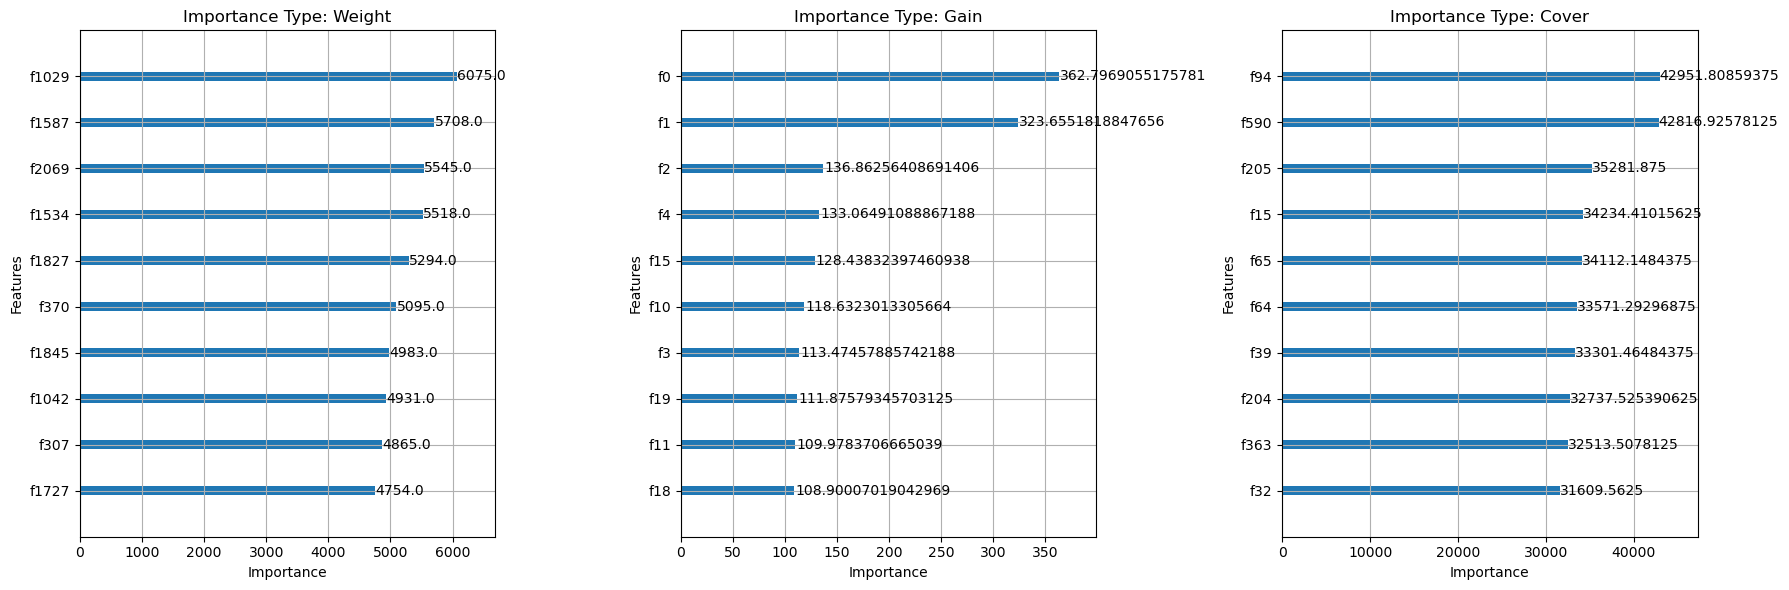

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

importance_types = ['weight', 'gain', 'cover']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, importance_type in enumerate(importance_types):
    feature_importances = xgb_model_best_config.get_score(importance_type=importance_type)

    xgb.plot_importance(xgb_model_best_config, importance_type=importance_type, max_num_features=10, ax=axes[i])

    axes[i].set_title(f"Importance Type: {importance_type.capitalize()}")
    axes[i].set_xlabel('Importance')
    axes[i].set_ylabel('Features')

plt.tight_layout()
plt.show()

In [ ]:
kmer_features = vectorizer.get_feature_names_out()

importance_type = 'gain'
feature_importances = xgb_model_best_config.get_score(importance_type=importance_type)

sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

top_features_kmers = []
for feature, importance in sorted_importances[:4096]:
    feature_index = int(feature[1:])
    kmer = kmer_features[feature_index]
    top_features_kmers.append((kmer, importance))

print("Top k-mers by importance:")
for kmer, importance in top_features_kmers:
    print(f"K-mer: {kmer}, Importance: {importance}")

Top k-mers by importance:
K-mer: tccgga, Importance: 635.247314453125
K-mer: gcgcgc, Importance: 519.852783203125
K-mer: gacaga, Importance: 207.66026306152344
K-mer: cgcgac, Importance: 180.17874145507812
K-mer: gtcgcg, Importance: 179.01341247558594
K-mer: tctgtc, Importance: 176.9088134765625
K-mer: gtcgac, Importance: 164.55331420898438
K-mer: cgcgcg, Importance: 163.19961547851562
K-mer: cgacgc, Importance: 159.32969665527344
K-mer: tacgga, Importance: 156.36676025390625
K-mer: cgccag, Importance: 151.42750549316406
K-mer: ggacag, Importance: 144.83648681640625
K-mer: tccgta, Importance: 143.98287963867188
K-mer: tttagc, Importance: 143.55718994140625
K-mer: gcgtcg, Importance: 142.4969482421875
K-mer: tcctcc, Importance: 141.1342010498047
K-mer: ctgtcc, Importance: 140.33926391601562
K-mer: tttaaa, Importance: 139.79693603515625
K-mer: tccggt, Importance: 138.7222137451172
K-mer: gctaaa, Importance: 137.51446533203125
K-mer: cagcgc, Importance: 136.6553497314453
K-mer: tctaga, Im

In [ ]:
from Bio.Seq import Seq

top_kmers_with_complements = []

for kmer, importance in top_features_kmers:
    rc_kmer = str(Seq(kmer).reverse_complement())

    rc_importance = None
    for other_kmer, other_importance in top_features_kmers:
        if other_kmer == rc_kmer:
            rc_importance = other_importance
            break

    top_kmers_with_complements.append((kmer, importance, rc_kmer, rc_importance))

print("Top k-mers and their reverse complements by importance:")
for kmer, importance, rc_kmer, rc_importance in top_kmers_with_complements:
    if rc_importance:
        print(f"K-mer: {kmer} (Importance: {importance}) <-> Reverse Complement: {rc_kmer} (Importance: {rc_importance})")
    else:
        print(f"K-mer: {kmer} (Importance: {importance}) - No reverse complement in top features")

Top k-mers and their reverse complements by importance:
K-mer: tccgga (Importance: 635.247314453125) <-> Reverse Complement: tccgga (Importance: 635.247314453125)
K-mer: gcgcgc (Importance: 519.852783203125) <-> Reverse Complement: gcgcgc (Importance: 519.852783203125)
K-mer: gacaga (Importance: 207.66026306152344) <-> Reverse Complement: tctgtc (Importance: 176.9088134765625)
K-mer: cgcgac (Importance: 180.17874145507812) <-> Reverse Complement: gtcgcg (Importance: 179.01341247558594)
K-mer: gtcgcg (Importance: 179.01341247558594) <-> Reverse Complement: cgcgac (Importance: 180.17874145507812)
K-mer: tctgtc (Importance: 176.9088134765625) <-> Reverse Complement: gacaga (Importance: 207.66026306152344)
K-mer: gtcgac (Importance: 164.55331420898438) <-> Reverse Complement: gtcgac (Importance: 164.55331420898438)
K-mer: cgcgcg (Importance: 163.19961547851562) <-> Reverse Complement: cgcgcg (Importance: 163.19961547851562)
K-mer: cgacgc (Importance: 159.32969665527344) <-> Reverse Complem

In [ ]:
from Bio.Seq import Seq
import numpy as np

# Step 1: Identify reverse complements and remove duplicates
unique_kmers = {}
for kmer, importance in top_features_kmers:
    rc_kmer = str(Seq(kmer).reverse_complement())

    # If the k-mer or its reverse complement is already added, skip adding again
    if kmer not in unique_kmers and rc_kmer not in unique_kmers:
        unique_kmers[kmer] = importance  # Only add unique k-mers

# Step 2: Get indices of unique k-mers in vectorized data
unique_indices = [kmer_features.tolist().index(k) for k in unique_kmers if k in kmer_features]

# Step 3: Filter the vectorized training, validation, and test data to keep only unique k-mers
X_train_unique = X_train[:, unique_indices]
X_val_unique = X_val[:, unique_indices]
X_test_unique = X_test[:, unique_indices]

print("Unique Train Matrix Shape:", X_train_unique.shape)
print("Unique Validation Matrix Shape:", X_val_unique.shape)
print("Unique Test Matrix Shape:", X_test_unique.shape)

Unique Train Matrix Shape: (14799230, 2080)
Unique Validation Matrix Shape: (1849645, 2080)
Unique Test Matrix Shape: (1850556, 2080)


In [ ]:
'''from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# BOAT-like Classifier with incremental training
class IncrementalTreeEnsemble:
    def __init__(self, base_estimator, n_estimators=10, max_samples=0.8, random_state=None):
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.random_state = random_state
        self.base_estimators = [base_estimator() for _ in range(self.n_estimators)]
        self.models_trained = False

    def fit(self, X, y):
        self.X, self.y = X, y  # Store for incremental updates
        rng = np.random.RandomState(self.random_state)

        # Bootstrap and train each tree initially
        for i, estimator in enumerate(self.base_estimators):
            sample_indices = rng.choice(X.shape[0], int(self.max_samples * X.shape[0]), replace=True)
            estimator.fit(X[sample_indices].toarray(), y[sample_indices])  # Convert to dense for fitting
        self.models_trained = True

    def incremental_update(self, X_new, y_new):
        """Simulates incremental updates in the BOAT method"""
        if not self.models_trained:
            raise ValueError("Model needs to be trained before incremental updates.")

        rng = np.random.RandomState(self.random_state)
        # Incrementally update each tree with a subset of new data
        for i, estimator in enumerate(self.base_estimators):
            sample_indices = rng.choice(X_new.shape[0], int(self.max_samples * X_new.shape[0]), replace=True)
            X_update, y_update = X_new[sample_indices].toarray(), y_new[sample_indices]  # Convert to dense
            estimator.fit(X_update, y_update)  # Refit tree on new subset

    def predict(self, X):
        # Aggregate predictions from each tree (bagging)
        predictions = np.array([estimator.predict(X.toarray()) for estimator in self.base_estimators])  # Convert to dense for prediction
        majority_vote = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
        return majority_vote

# Load your data (assuming X_train, X_val, y_train, y_val are ready)
base_tree = DecisionTreeClassifier
boat_ensemble = IncrementalTreeEnsemble(base_estimator=base_tree, n_estimators=10, max_samples=0.8, random_state=42)

# Initial fit
boat_ensemble.fit(X_train_unique, y_train)

# Evaluate initial performance
y_val_pred = boat_ensemble.predict(X_val_unique)
initial_accuracy = accuracy_score(y_val, y_val_pred)
initial_f1 = f1_score(y_val, y_val_pred, average="weighted")

print("Initial Validation Accuracy:", initial_accuracy)
print("Initial Validation F1 Score:", initial_f1)

# Simulate an incremental update with new data
boat_ensemble.incremental_update(X_test_unique, y_test)

# Evaluate performance after incremental update
y_val_pred_updated = boat_ensemble.predict(X_val_unique)
updated_accuracy = accuracy_score(y_val, y_val_pred_updated)
updated_f1 = f1_score(y_val, y_val_pred_updated, average="weighted")

print("Updated Validation Accuracy:", updated_accuracy)
print("Updated Validation F1 Score:", updated_f1)


In [ ]:
import numpy as np
from scipy.sparse import csr_matrix

top_kmers = [kmer for kmer, importance in sorted_importances[:10]]

def filter_top_kmers(matrix, vectorizer, top_kmers):
    feature_names = vectorizer.get_feature_names_out()
    top_kmer_indices = [np.where(feature_names == kmer)[0][0] for kmer in top_kmers if kmer in feature_names]

    matrix_reduced = matrix[:, top_kmer_indices]
    return matrix_reduced

X_train_reduced = filter_top_kmers(X_train, vectorizer, top_kmers)
X_val_reduced = filter_top_kmers(X_val, vectorizer, top_kmers)
X_test_reduced = filter_top_kmers(X_test, vectorizer, top_kmers)

print("Reduced Train Matrix Shape:", X_train_reduced.shape)
print("Reduced Validation Matrix Shape:", X_val_reduced.shape)
print("Reduced Test Matrix Shape:", X_test_reduced.shape)

Reduced Train Matrix Shape: (14799230, 0)
Reduced Validation Matrix Shape: (1849645, 0)
Reduced Test Matrix Shape: (1850556, 0)


In [ ]:
# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Find matches between the top k-mers and the vectorizer's features
missing_kmers = [kmer for kmer in top_kmers if kmer not in feature_names]
present_kmers = [kmer for kmer in top_kmers if kmer in feature_names]

print(f"Number of missing k-mers: {len(missing_kmers)}")
print(f"Number of present k-mers: {len(present_kmers)}")
print("Sample of missing k-mers:", missing_kmers[:10])

# Filter using only the present k-mers
top_kmer_indices = [np.where(feature_names == kmer)[0][0] for kmer in present_kmers if kmer in feature_names]
X_train_reduced = X_train[:, top_kmer_indices]
X_val_reduced = X_val[:, top_kmer_indices]
X_test_reduced = X_test[:, top_kmer_indices]

print("Reduced Train Matrix Shape:", X_train_reduced.shape)
print("Reduced Validation Matrix Shape:", X_val_reduced.shape)
print("Reduced Test Matrix Shape:", X_test_reduced.shape)


Number of missing k-mers: 10
Number of present k-mers: 0
Sample of missing k-mers: ['f3432', 'f2457', 'f2120', 'f1633', 'f2918', 'f3565', 'f2913', 'f1638', 'f1561', 'f3176']
Reduced Train Matrix Shape: (14799230, 0)
Reduced Validation Matrix Shape: (1849645, 0)
Reduced Test Matrix Shape: (1850556, 0)


In [ ]:
top_n_features = 1000
feature_names = vectorizer.get_feature_names_out()
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
top_feature_indices = [int(feature[0][1:]) for feature in sorted_importances[:top_n_features]]
selected_kmers = [feature_names[idx] for idx in top_feature_indices if idx < len(feature_names)]
selected_indices = [idx for idx in top_feature_indices if idx < len(feature_names)]
X_train_reduced = X_train[:, selected_indices]
X_val_reduced = X_val[:, selected_indices]
X_test_reduced = X_test[:, selected_indices]

print(f"Reduced Train Matrix Shape with top {top_n_features} features:", X_train_reduced.shape)
print(f"Reduced Validation Matrix Shape with top {top_n_features} features:", X_val_reduced.shape)
print(f"Reduced Test Matrix Shape with top {top_n_features} features:", X_test_reduced.shape)
print(f"Top {top_n_features} k-mers by importance based on XGBoost:", selected_kmers)

Reduced Train Matrix Shape with top 1000 features: (14799230, 1000)
Reduced Validation Matrix Shape with top 1000 features: (1849645, 1000)
Reduced Test Matrix Shape with top 1000 features: (1850556, 1000)
Top 1000 k-mers by importance based on XGBoost: ['tccgga', 'gcgcgc', 'gacaga', 'cgcgac', 'gtcgcg', 'tctgtc', 'gtcgac', 'cgcgcg', 'cgacgc', 'tacgga', 'cgccag', 'ggacag', 'tccgta', 'tttagc', 'gcgtcg', 'tcctcc', 'ctgtcc', 'tttaaa', 'tccggt', 'gctaaa', 'cagcgc', 'tctaga', 'tagcgc', 'gctagc', 'accgga', 'ctgtct', 'ggagga', 'ctggcg', 'tttaga', 'tctaaa', 'ttccgg', 'gcgcta', 'ctagag', 'agacag', 'ctctag', 'ccggaa', 'tctagc', 'ggatat', 'ctaaaa', 'gcgctg', 'cacaga', 'ttctag', 'atatcc', 'atcgga', 'ctatag', 'gtatat', 'ttttag', 'gtatac', 'cgatcg', 'atatac', 'acctag', 'gctaga', 'ttcgga', 'ctaggt', 'ggaatc', 'gctaac', 'ctagaa', 'tccgaa', 'catgga', 'cggaga', 'tccgat', 'gcgcca', 'gttagc', 'gcacta', 'gcgcga', 'tgtcaa', 'tctgtg', 'ctgtat', 'ctagct', 'taaccc', 'gggtta', 'tcgcgc', 'agctag', 'aaattt', 'tcca

In [ ]:
'''from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np


def train_initial_tree(X, y, max_depth=None):
    """
    Train the initial decision tree on a bootstrap sample.
    """
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X, y)
    return clf

def validate_and_update_tree(clf, X_val, y_val):
    """
    Validate and refine the tree on a new dataset. If performance drops, retrain specific parts.
    """
    predictions = clf.predict(X_val)
    initial_accuracy = accuracy_score(y_val, predictions)

    threshold_accuracy = 0.8
    if initial_accuracy < threshold_accuracy:
        print(f"Accuracy {initial_accuracy} below threshold. Updating tree...")
        clf.fit(X_val, y_val)
    else:
        print(f"Tree validated with accuracy: {initial_accuracy}")

    return clf, initial_accuracy

def boat_algorithm(X_full, y_full, num_iterations=5, max_depth=None):
    """
    Perform BOAT using bootstrapped samples from the dataset.
    """
    accuracies = []

    # Step 1: Initialize the model with a bootstrap sample
    X_bootstrap, y_bootstrap = resample(X_full, y_full, random_state=42)
    clf = train_initial_tree(X_bootstrap, y_bootstrap, max_depth=max_depth)

    # Step 2: Iteratively validate and update with new samples
    for i in range(num_iterations):
        print(f"\nIteration {i + 1}")

        # Generate a new bootstrap sample to simulate new unique dataset
        X_val, y_val = resample(X_full, y_full, random_state=i)

        # Validate and update the tree with the new sample
        clf, accuracy = validate_and_update_tree(clf, X_val, y_val)
        accuracies.append(accuracy)

    return clf, accuracies


np.random.seed(0)
X_full = np.random.rand(1000, 10)  # 1000 samples, 10 features
y_full = np.random.randint(0, 2, 1000)  # Binary target

# Run BOAT algorithm
final_tree, performance = boat_algorithm(X_full, y_full, num_iterations=5, max_depth=5)

print("\nFinal Tree Performance over iterations:", performance)

In [ ]:
'''import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from joblib import Parallel, delayed
import matplotlib.pyplot as plt

def fit_tree(X_resampled, y_resampled, max_depth, random_state):
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    tree.fit(X_resampled, y_resampled)
    return tree

class BOATParallel:
    def __init__(self, n_estimators=10, max_depth=5, random_state=None, n_jobs=1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.n_jobs = n_jobs
        self.trees = []

    def fit(self, X_train, y_train):
        np.random.seed(self.random_state)

        trees = Parallel(n_jobs=self.n_jobs)(
            delayed(fit_tree)(*resample(X_train, y_train, random_state=self.random_state), self.max_depth, self.random_state)
            for _ in range(self.n_estimators)
        )
        self.trees.extend(trees)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.squeeze(np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions))

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return accuracy_score(y_test, y_pred)

boat_model = BOATParallel(n_estimators=10, max_depth=5, random_state=42, n_jobs=2)
boat_model.fit(X_train, y_train)

In [ ]:
'''accuracy = boat_model.evaluate(X_test, y_test)
print(f"BOAT Model Test Accuracy: {accuracy:.4f}")

importances = np.mean([tree.feature_importances_ for tree in boat_model.trees], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), indices, rotation=90)
plt.title("Feature Importances (BOAT Model)")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

In [ ]:
import dask.array as da
from dask_ml.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import dask.dataframe as dd

X_train_dask = da.from_array(X_train, chunks=(1000, X_train.shape[1]))
X_test_dask = da.from_array(X_test, chunks=(1000, X_test.shape[1]))

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_dask, y_train)

y_pred = rf.predict(X_test_dask)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
'''from sklearn.linear_model import SGDClassifier
import numpy as np

class OnlineSVM:
    def __init__(self, learning_rate=0.1, max_iter=1000):
        self.model = SGDClassifier(loss='hinge', learning_rate='constant', eta0=learning_rate, max_iter=1, warm_start=True)
        self.max_iter = max_iter

    def fit(self, X_train, y_train):
        # Train incrementally (mini-batch)
        for i in range(self.max_iter):
            self.model.partial_fit(X_train, y_train, classes=np.unique(y_train))
            print(f"Iteration {i + 1}/{self.max_iter} complete.")

    def predict(self, X):
        return self.model.predict(X)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        return accuracy

online_svm = OnlineSVM(learning_rate=0.01, max_iter=100)
online_svm.fit(X_train, y_train)
accuracy = online_svm.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
from skmultiflow.trees import HoeffdingTree
from sklearn.metrics import accuracy_score
import numpy as np

class IncrementalDecisionTree:
    def __init__(self):
        self.model = HoeffdingTree()

    def fit(self, X_train, y_train):
        for i in range(len(X_train)):
            self.model.partial_fit(X_train[i:i+1], y_train[i:i+1], classes=np.unique(y_train))
            if (i + 1) % 100 == 0:
                print(f"Processed {i + 1} samples.")

    def predict(self, X):
        return self.model.predict(X)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy

incremental_dt = IncrementalDecisionTree()

incremental_dt.fit(X_train, y_train)

accuracy = incremental_dt.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")